In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [28]:
dataset = pd.read_csv('fish.csv')
dataset.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [30]:
dataset.shape

(159, 6)

In [31]:
dataset.isna().sum()

Species     0
Weight      0
Length      0
Diagonal    0
Height      0
Width       0
dtype: int64

In [32]:
dataset.isna().sum().sum()

0

In [33]:
dataset['Species']

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [34]:
dataset.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [47]:
dataset.describe()

,Species,Weight,Length,Diagonal,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,2.250000,375.217308,27.786538,30.571154,8.951128,4.375719
std,1.717556,319.546978,9.792651,10.695359,4.324325,1.672188
min,0.000000,0.000000,8.400000,8.800000,1.728400,1.047600
25%,1.000000,120.000000,21.000000,23.025000,5.931675,3.369600
50%,2.000000,271.000000,26.750000,29.250000,7.647800,4.243300
75%,4.000000,612.500000,35.000000,39.425000,12.378550,5.424375
max,6.000000,1250.000000,56.000000,59.700000,18.957000,8.142000


## Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
LabEnc = LabelEncoder()

In [37]:
dataset['Species'] = LabEnc.fit_transform(dataset['Species'])

In [38]:
LabEnc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [39]:
dataset

,Species,Weight,Length,Diagonal,Height,Width
0,0,242.0,25.4,30.0,11.5200,4.0200
1,0,290.0,26.3,31.2,12.4800,4.3056
2,0,340.0,26.5,31.1,12.3778,4.6961
3,0,363.0,29.0,33.5,12.7300,4.4555
4,0,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,5,12.2,12.2,13.4,2.0904,1.3936
155,5,13.4,12.4,13.5,2.4300,1.2690
156,5,12.2,13.0,13.8,2.2770,1.2558
157,5,19.7,14.3,15.2,2.8728,2.0672


## Outlier Handling

In [43]:
def outlier_remove(col):
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    Lower_Limit = Q1 - 1.5*IQR
    Upper_Limit = Q3 + 1.5*IQR

    return dataset[(dataset[col]<=Upper_Limit) & (dataset[col]>=Lower_Limit)] #remove outlier

In [44]:
for i in dataset.columns:
    dataset = outlier_remove(i)

In [45]:
dataset

,Species,Weight,Length,Diagonal,Height,Width
0,0,242.0,25.4,30.0,11.5200,4.0200
1,0,290.0,26.3,31.2,12.4800,4.3056
2,0,340.0,26.5,31.1,12.3778,4.6961
3,0,363.0,29.0,33.5,12.7300,4.4555
4,0,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,5,12.2,12.2,13.4,2.0904,1.3936
155,5,13.4,12.4,13.5,2.4300,1.2690
156,5,12.2,13.0,13.8,2.2770,1.2558
157,5,19.7,14.3,15.2,2.8728,2.0672


## Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
MinSca = MinMaxScaler()

In [51]:
dataset['Weight'] = MinSca.fit_transform(dataset[['Weight']])

In [52]:
dataset

,Species,Weight,Length,Diagonal,Height,Width
0,0,0.19360,25.4,30.0,11.5200,4.0200
1,0,0.23200,26.3,31.2,12.4800,4.3056
2,0,0.27200,26.5,31.1,12.3778,4.6961
3,0,0.29040,29.0,33.5,12.7300,4.4555
4,0,0.34400,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,5,0.00976,12.2,13.4,2.0904,1.3936
155,5,0.01072,12.4,13.5,2.4300,1.2690
156,5,0.00976,13.0,13.8,2.2770,1.2558
157,5,0.01576,14.3,15.2,2.8728,2.0672


## Split the data 

In [53]:
features = dataset.iloc[:, 1:]

In [54]:
label = dataset[['Species']]

In [55]:
features.head()

,Weight,Length,Diagonal,Height,Width
0,0.1936,25.4,30.0,11.5200,4.0200
1,0.2320,26.3,31.2,12.4800,4.3056
2,0.2720,26.5,31.1,12.3778,4.6961
3,0.2904,29.0,33.5,12.7300,4.4555
4,0.3440,29.0,34.0,12.4440,5.1340


In [56]:
label.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [57]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(features, label, test_size=0.3 ,random_state=42)

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#LinReg = LinearRegression()
LogReg = LogisticRegression(random_state=42)
RanFor = RandomForestClassifier(random_state=42)
GraBoos = GradientBoostingClassifier(random_state=42)
DecTree = DecisionTreeClassifier(random_state=42)
Knn = KNeighborsClassifier(n_neighbors=5)
GnB = GaussianNB()
Svc = SVC()

In [95]:
Model_List = [LogReg,RanFor,GraBoos,DecTree,Knn,GnB,Svc]

In [96]:
from sklearn.metrics import classification_report,confusion_matrix

In [97]:
Accuracy = []
Model_Name = []

def calculation(model,Xtrain,Xtest,ytrain,ytest):
    print(type(model).__name__)
    Model_Name.append(type(model).__name__)
    model.fit(Xtrain,ytrain)
    print('Score: ',model.score(Xtest,ytest))
    Accuracy.append(model.score(Xtest,ytest))
    predict = model.predict(Xtest)
    print('Confusion_Matrix:', confusion_matrix(predict,ytest))
    print('classification_report:', classification_report(predict,ytest))

for i in Model_List:
    calculation(i,Xtrain,Xtest,ytrain,ytest)

LogisticRegression
Score:  0.9574468085106383
Confusion_Matrix: [[11  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0 18  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  4  0  2]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0]]
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         7
           4       1.00      0.67      0.80         6
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         0

    accuracy                           0.96        47
   macro avg       0.86      0.81      0.83        47
weighted avg       1.00      0.96      0.97        47

RandomForestClassifier
Score:  0.8297872340425532
Confusion_Matrix: [[11  0  1  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0 15  0  3  0  0]
 [ 0  0

In [98]:
Model_Name

['LogisticRegression',
 'RandomForestClassifier',
 'GradientBoostingClassifier',
 'DecisionTreeClassifier',
 'KNeighborsClassifier',
 'GaussianNB',
 'SVC']

In [99]:
Accuracy

[0.9574468085106383,
 0.8297872340425532,
 0.7446808510638298,
 0.6808510638297872,
 0.723404255319149,
 0.5319148936170213,
 0.6382978723404256]

## Model Evaluation

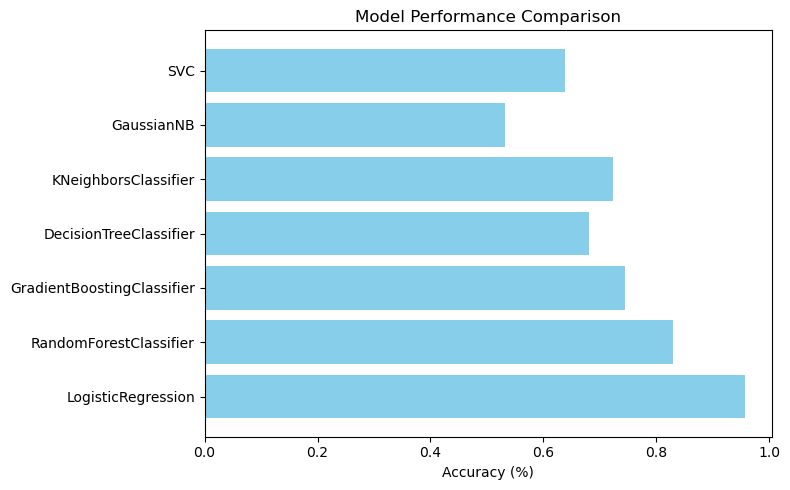

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
bars = plt.barh(Model_Name, Accuracy, color='skyblue')

plt.xlabel('Accuracy (%)')
plt.title('Model Performance Comparison')

plt.tight_layout()
plt.show()
